<a href="https://colab.research.google.com/github/aayushsh2003/ML/blob/main/Exp_9_Locally_Weighted_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Experiment 9***

Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

LWR is a non-parametric regression algorithm that fits a local linear model around each query point using a weighted least squares method, where nearby points have more influence (higher weight) than far ones.

τ (tau): Bandwidth parameter controlling how “local” the regression is.

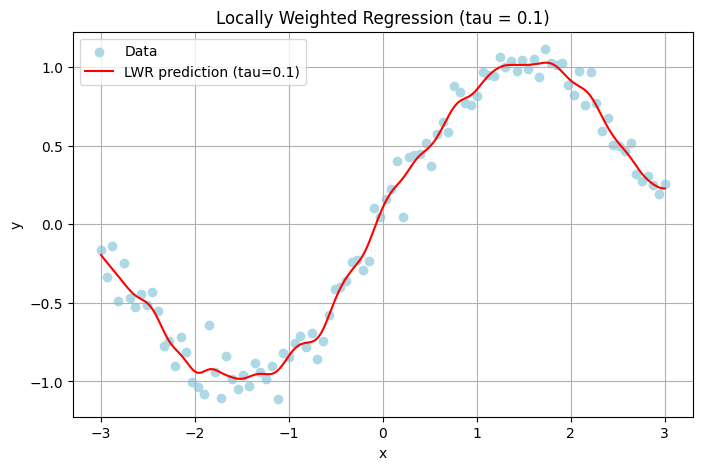

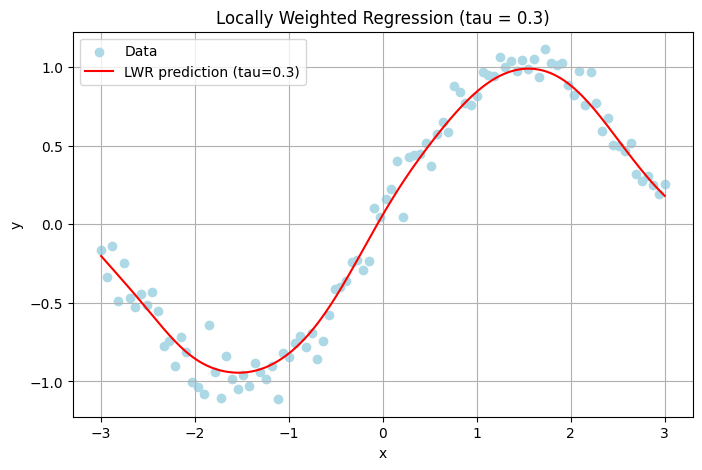

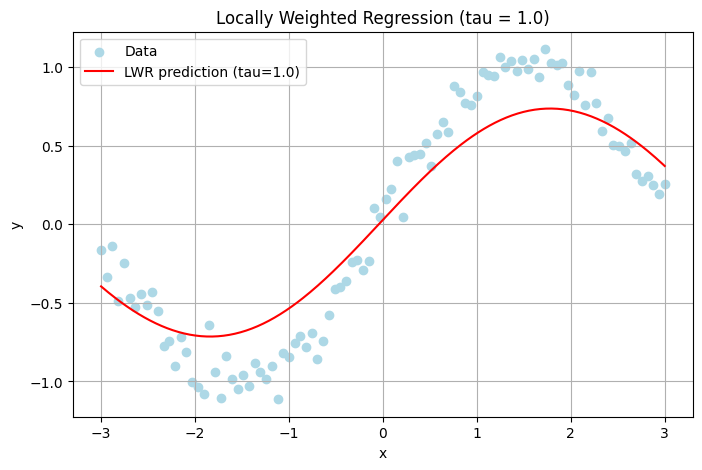

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
def generate_data():
    X = np.linspace(-3, 3, 100)
    y = np.sin(X) + 0.1 * np.random.randn(100)
    return X.reshape(-1, 1), y

# Add intercept term
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

# Weight matrix for a given query point x_query
def get_weights(X, x_query, tau):
    m = X.shape[0]
    weights = np.exp(-np.square(X - x_query).flatten() / (2 * tau**2))
    return np.diag(weights)

# Locally Weighted Regression
def locally_weighted_regression(X, y, tau, X_query):
    X_bias = add_bias(X)
    y_pred = []

    for x in X_query:
        W = get_weights(X, x, tau)
        theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ y
        x_bias = np.array([1, x[0]])
        y_hat = x_bias @ theta
        y_pred.append(y_hat)

    return np.array(y_pred)

# Main function
def main():
    X, y = generate_data()
    X_query = np.linspace(-3, 3, 300).reshape(-1, 1)

    for tau in [0.1, 0.3, 1.0]:
        y_pred = locally_weighted_regression(X, y, tau, X_query)

        plt.figure(figsize=(8, 5))
        plt.scatter(X, y, label="Data", color="lightblue")
        plt.plot(X_query, y_pred, label=f"LWR prediction (tau={tau})", color="red")
        plt.title(f"Locally Weighted Regression (tau = {tau})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()

main()

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

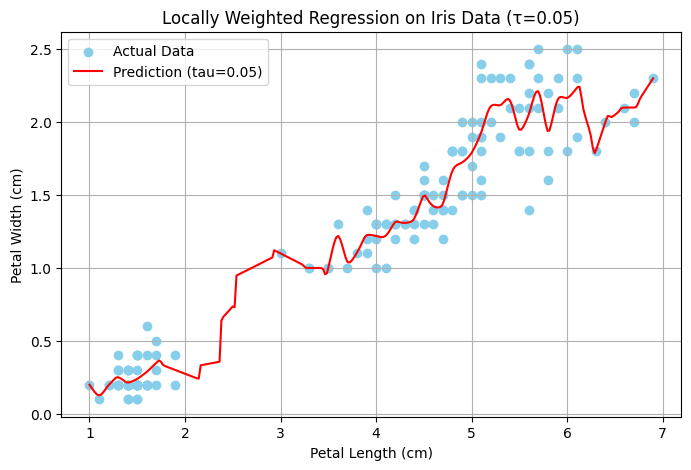

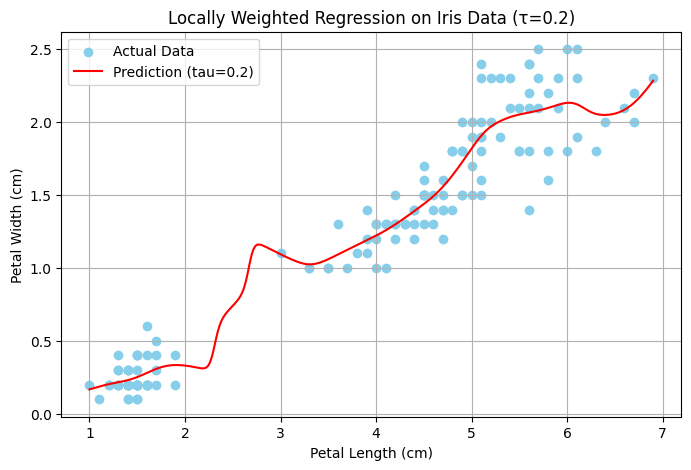

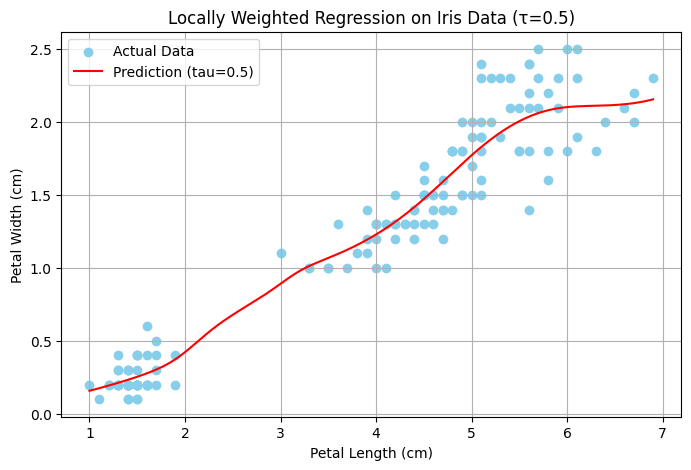

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Add intercept to X
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

# Gaussian weights
def get_weights(X, x_query, tau):
    weights = np.exp(-np.square(X - x_query).flatten() / (2 * tau**2))
    return np.diag(weights)

# Locally Weighted Regression
def locally_weighted_regression(X, y, tau, X_query):
    X_bias = add_bias(X)
    y_pred = []

    for x in X_query:
        W = get_weights(X, x, tau)
        theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ y
        x_bias = np.array([1, x[0]])
        y_hat = x_bias @ theta
        y_pred.append(y_hat)

    return np.array(y_pred)

# Load Iris dataset
def load_iris_data():
    iris = datasets.load_iris()
    X = iris.data[:, 2].reshape(-1, 1)  # Petal length
    y = iris.data[:, 3]                 # Petal width
    return X, y

# Main
def main():
    X, y = load_iris_data()
    X_query = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

    for tau in [0.05, 0.2, 0.5]:
        y_pred = locally_weighted_regression(X, y, tau, X_query)

        plt.figure(figsize=(8, 5))
        plt.scatter(X, y, label="Actual Data", color="skyblue")
        plt.plot(X_query, y_pred, label=f"Prediction (tau={tau})", color="red")
        plt.title(f"Locally Weighted Regression on Iris Data (τ={tau})")
        plt.xlabel("Petal Length (cm)")
        plt.ylabel("Petal Width (cm)")
        plt.legend()
        plt.grid(True)
        plt.show()

main()